In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from os.path import join

In [2]:
results_dir = 'results/exp_9/'
ext = 'npy'
results_files = [str(path) for path in Path(results_dir).rglob('*.{}'.format(ext))]
results_files

['results/exp_9/rand_0.npy', 'results/exp_9/mc_0.npy']

In [3]:
mc_files = list(filter(lambda f: 'mc' in f , results_files))
rand_files = list(filter(lambda f: 'rand' in f , results_files))
bald_files = list(filter(lambda f: 'bald' in f , results_files))
max_files = list(filter(lambda f: 'max' in f , results_files))

mc_files, rand_files, bald_files, max_files

(['results/exp_9/mc_0.npy'], ['results/exp_9/rand_0.npy'], [], [])

In [4]:
mc_results = np.array([np.load(f) for f in mc_files])
mc_results.shape

(1, 11)

In [5]:
rand_results = np.array([np.load(f) for f in rand_files])
rand_results.shape

(1, 11)

In [6]:
bald_results = np.array([np.load(f) for f in bald_files])
bald_results.shape

(0,)

In [7]:
max_results = np.array([np.load(f) for f in max_files])
max_results.shape

(0,)

In [8]:
mc_means = mc_results.mean(axis=0)
mc_means

array([0.5685252 , 0.645635  , 0.7081308 , 0.75680864, 0.79403573,
       0.7941124 , 0.78930694, 0.8102828 , 0.8241502 , 0.8323904 ,
       0.8299791 ], dtype=float32)

In [9]:
rand_means = rand_results.mean(axis=0)
rand_means

array([0.57873976, 0.6099135 , 0.63034415, 0.74398977, 0.7754369 ,
       0.7981988 , 0.8049372 , 0.8296092 , 0.83468723, 0.8403696 ,
       0.84423244], dtype=float32)

In [10]:
bald_means = bald_results.mean(axis=0)
bald_means

/home/victor/anaconda3/envs/al/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice.
  """Entry point for launching an IPython kernel.
/home/victor/anaconda3/envs/al/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

In [11]:
max_means = max_results.mean(axis=0)
max_means

/home/victor/anaconda3/envs/al/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice.
  """Entry point for launching an IPython kernel.


nan

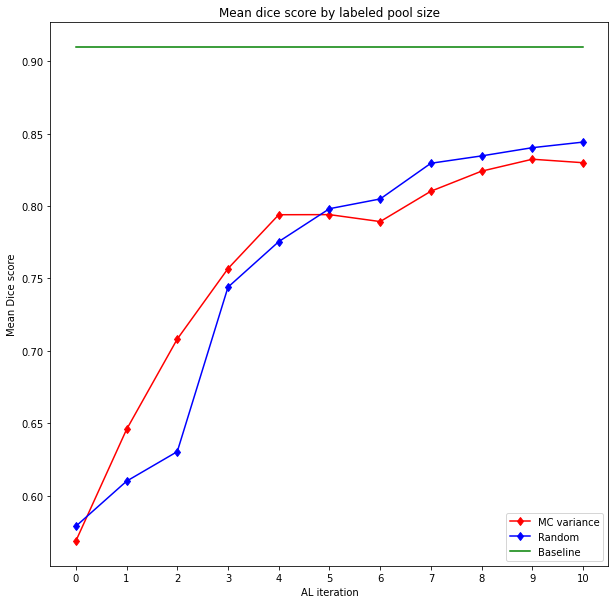

In [13]:
x_len = len(rand_means)
plt.figure(figsize=(10, 10))
plt.plot(range(x_len), mc_means, 'rd-', label='MC variance')
plt.plot(range(x_len), rand_means, 'bd-', label='Random')
# plt.plot(range(x_len), bald_means, 'gd-', label='BALD')
# plt.plot(range(x_len), max_means, 'yd-', label='MAX')
plt.plot(range(x_len), np.ones(x_len) * 0.91, 'g-', label='Baseline')
plt.xlabel('AL iteration')
plt.ylabel('Mean Dice score')
plt.title('Mean dice score by labeled pool size')
plt.xticks(np.arange(0, x_len, step=1))
plt.legend()

plt.savefig(join(results_dir, 'results_mc.png'))